# **Project 2**
### Josh Winnes and Jon Contreras

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

import geopandas as gpd
import shapely
import skmob
from skmob.measures.individual import jump_lengths
from skmob.tessellation import tilers
from skmob.preprocessing import detection, clustering
from skmob.preprocessing import filtering

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)
import warnings
warnings.simplefilter("ignore")

import os
import sys

try:       
    kmz_file_path_josh = '/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/data/March 7, 2024 - Whistler Blackcomb(Josh).kmz'
    kmz_file_path_jon = '/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/data/March 7, 2024 - Whistler Blackcomb(Jon).kmz'
    gpx_file_name_josh = 'March 7, 2024 - Whistler Blackcomb(Josh).gpx'
    gpx_file_name_jon = 'March 7, 2024 - Whistler Blackcomb(Jon).gpx'
    script_directory = '/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/Math485/Project2'
    
    os.chdir('/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/data')
    sys.path.append(script_directory)
    from gpx_kmz_util import *
    
    gpx_josh, run_info_josh = data_preprocessing(gpx_file_name_josh, kmz_file_path_josh)
    gpx_jon, run_info_jon = data_preprocessing(gpx_file_name_jon, kmz_file_path_jon)
    
    print('Working from Josh\'s laptop')
except FileNotFoundError:
    
    data_dir = 'your_data_directory_path'
    kmz_file_path_josh = 'path_to_josh_kmz_file'
    kmz_fil_path_jon = 'path_to_jon_kmz_file'
    gpx_file_name_josh = 'gpx_file_name_josh'
    gpx_file_name_jon = 'gpx_file_name_jon'
    script_directory = 'path_to_Project2'
    
    os.chdir(data_dir)
    sys.path.append(script_directory)
    from gpx_kmz_util import *
    
    gpx_josh, run_info_josh = data_preprocessing(gpx_file_name_josh, kmz_file_path_josh)
    gpx_jon, run_info_jon = data_preprocessing(gpx_file_name_jon, kmz_file_path_jon)
    
    print('Working from Jonathan\'s laptop')

Working from Josh's laptop


In [2]:
gpx_josh.head(30)

,Latitude,Longitude,Elevation,Time,Name
0,50.113260,-122.953950,683.549635,2024-03-07 09:46:36-08:00,pre_lift_1
1,50.113391,-122.953915,686.117031,2024-03-07 09:46:36-08:00,pre_lift_1
2,50.113319,-122.953772,688.737785,2024-03-07 09:48:27-08:00,pre_lift_1
3,50.113267,-122.953655,689.777724,2024-03-07 09:48:32-08:00,pre_lift_1
4,50.113181,-122.953594,692.476930,2024-03-07 09:49:04-08:00,pre_lift_1
5,50.113095,-122.953502,691.570411,2024-03-07 09:49:13-08:00,pre_lift_1
6,50.113067,-122.953366,691.382969,2024-03-07 09:49:35-08:00,Lift 1
7,50.112973,-122.953325,686.006277,2024-03-07 09:50:35-08:00,Lift 1
8,50.112877,-122.953391,681.919232,2024-03-07 09:51:15-08:00,Lift 1
9,50.112725,-122.953385,681.302449,2024-03-07 09:51:28-08:00,Lift 1


In [3]:
gpx_jon.head(30)

,Latitude,Longitude,Elevation,Time,Name
0,50.111385,-122.951516,699.522521,2024-03-07 09:52:51-08:00,pre_lift_1
1,50.109740,-122.953332,709.858664,2024-03-07 09:52:52-08:00,pre_lift_1
2,50.109765,-122.953274,741.954162,2024-03-07 09:52:53-08:00,pre_lift_1
3,50.109679,-122.953279,746.486242,2024-03-07 09:52:55-08:00,Lift 1
4,50.109586,-122.953275,748.005084,2024-03-07 09:52:58-08:00,Lift 1
5,50.109493,-122.953277,748.946129,2024-03-07 09:53:01-08:00,Lift 1
6,50.109389,-122.953282,749.281006,2024-03-07 09:53:03-08:00,Lift 1
7,50.109282,-122.953280,750.218117,2024-03-07 09:53:06-08:00,Lift 1
8,50.109176,-122.953279,751.754523,2024-03-07 09:53:09-08:00,Lift 1
9,50.109065,-122.953292,753.590171,2024-03-07 09:53:12-08:00,Lift 1


In [4]:
run_info_josh

,Name,Longitude,Latitude,Elevation,Time,time_elapsed,end_time
0,Lift 1,-122.953366,50.113067,691.382969,2024-03-07 09:49:35-08:00,0 days 00:22:04,2024-03-07 10:11:39-08:00
1,Run 1,-122.951056,50.078425,1681.088996,2024-03-07 10:11:39-08:00,0 days 00:10:54,2024-03-07 10:22:33-08:00
2,Lift 2,-122.963743,50.085441,1301.686260,2024-03-07 10:22:33-08:00,0 days 00:13:51,2024-03-07 10:36:24-08:00
3,Run 2,-122.947029,50.067096,1855.330032,2024-03-07 10:36:24-08:00,0 days 00:06:53,2024-03-07 10:43:17-08:00
5,Lift 3,-122.952236,50.066824,1779.142854,2024-03-07 10:43:17-08:00,0 days 00:04:03,2024-03-07 10:47:20-08:00
6,Run 3,-122.957573,50.059251,2183.242267,2024-03-07 10:47:20-08:00,0 days 01:17:11,2024-03-07 12:04:31-08:00
8,Lift 4,-122.964118,50.085837,1299.682279,2024-03-07 12:04:31-08:00,0 days 00:11:38,2024-03-07 12:16:09-08:00
9,Run 4,-122.947552,50.066370,1853.043952,2024-03-07 12:16:09-08:00,0 days 00:02:54,2024-03-07 12:19:03-08:00
10,Lift 5,-122.952248,50.066714,1772.088558,2024-03-07 12:19:03-08:00,0 days 00:03:50,2024-03-07 12:22:53-08:00
11,Run 5,-122.957416,50.059398,2178.784326,2024-03-07 12:22:53-08:00,0 days 00:15:21,2024-03-07 12:38:14-08:00


In [5]:
run_info_jon

,Name,Longitude,Latitude,Elevation,Time,time_elapsed,end_time
0,Lift 1,-122.953279,50.109679,746.486242,2024-03-07 09:52:55-08:00,0 days 00:17:35,2024-03-07 10:10:30-08:00
1,Run 1,-122.951039,50.079034,1678.810227,2024-03-07 10:10:30-08:00,0 days 00:12:03,2024-03-07 10:22:33-08:00
3,Lift 2,-122.963696,50.085477,1294.527448,2024-03-07 10:22:33-08:00,0 days 00:13:53,2024-03-07 10:36:26-08:00
4,Run 2,-122.947079,50.067145,1844.829283,2024-03-07 10:36:26-08:00,0 days 00:06:09,2024-03-07 10:42:35-08:00
5,Lift 3,-122.952012,50.067018,1772.808738,2024-03-07 10:42:35-08:00,0 days 00:04:37,2024-03-07 10:47:12-08:00
6,Run 3,-122.957425,50.059362,2170.953821,2024-03-07 10:47:12-08:00,0 days 01:04:53,2024-03-07 11:52:05-08:00
7,Lift 4,-122.988703,50.093790,656.509161,2024-03-07 11:52:05-08:00,0 days 00:39:09,2024-03-07 12:31:14-08:00
8,Run 4,-122.963043,50.058412,2059.593358,2024-03-07 12:31:14-08:00,0 days 01:45:49,2024-03-07 14:17:03-08:00
9,Lift 5 (Excelerator Express),-122.922710,50.111669,1126.007092,2024-03-07 14:17:03-08:00,0 days 00:09:30,2024-03-07 14:26:33-08:00
10,Run 5,-122.904938,50.103308,1634.285129,2024-03-07 14:26:33-08:00,0 days 00:16:58,2024-03-07 14:43:31-08:00


### ***Calculating Max Speed and Wait Time***

#### separating by run/lift

In [6]:
from haversine import haversine

def get_dist_time(df):
    # Shift latitude and longitude columns for previous points
    df.drop_duplicates()
    
    df['Latitude_Shifted'] = df['Latitude'].shift()
    df['Longitude_Shifted'] = df['Longitude'].shift()

    # Calculate distances
    df['Distance'] = df.apply(
        lambda row: haversine(
            (row['Latitude'], row['Longitude']),
            (row['Latitude_Shifted'], row['Longitude_Shifted'])
        ) * 1000 if not pd.isna(row['Latitude_Shifted']) else 0,
        axis=1
    )

    # Calculate time differences
    df['Time_Diff'] = df['Time'].diff().dt.total_seconds()

    # Calculate speeds
    df['Speed'] = df['Distance'] / df['Time_Diff']
    df['Speed'].fillna(0, inplace=True)  # Set speed to 0 for the first row
    df['Speed_MPH'] = df['Speed']*2.2369362920544
    df['Time_Diff'].fillna(0,inplace=True)

    # Drop the temporary shifted columns
    df.drop(['Latitude_Shifted', 'Longitude_Shifted'], axis=1, inplace=True)
    
    df['Time'] = pd.to_datetime(df['Time'], errors = 'coerce').dt.tz_localize(None)
    df.dropna(subset=['Time'], inplace = True)

    return df

In [7]:
gpx_jon = get_dist_time(gpx_jon)
gpx_josh = get_dist_time(gpx_josh)

In [8]:
gpx_jon = gpx_jon[gpx_jon['Name']!='pre_lift_1']
gpx_jon = gpx_jon[gpx_jon['Speed']<45]
gpx_jon.describe()

,Latitude,Longitude,Elevation,Time,Distance,Time_Diff,Speed,Speed_MPH
count,3056.000000,3056.000000,3056.000000,3056,3056.000000,3056.000000,3056.000000,3056.000000
mean,50.088577,-122.946379,1419.476832,2024-03-07 12:32:45.609293056,15.326789,7.593914,5.069533,11.340221
min,50.057737,-122.988986,654.396700,2024-03-07 09:52:55,0.000000,0.000000,0.000000,0.000000
25%,50.074099,-122.964726,1143.715007,2024-03-07 10:44:21.249999872,11.065187,2.000000,3.611598,8.078915
50%,50.090027,-122.953914,1509.894277,2024-03-07 12:39:57,12.030496,3.000000,4.223454,9.447596
75%,50.106111,-122.915062,1680.538784,2024-03-07 14:31:25.500000,13.265621,3.000000,6.562999,14.681012
max,50.119271,-122.891418,2172.170411,2024-03-07 16:19:42,3799.226027,2898.000000,19.777727,44.241515
std,0.018088,0.028240,381.411522,NaN,102.794316,83.822451,3.018539,6.752279


In [9]:
gpx_josh = gpx_josh[gpx_josh['Name']!='pre_lift_1']
gpx_josh = gpx_josh[gpx_josh['Speed']<45]
gpx_josh.sort_values(by = 'Speed', ascending=False)

,Latitude,Longitude,Elevation,Time,Name,Distance,Time_Diff,Speed,Speed_MPH
1991,50.058496,-122.950903,1955.666818,2024-03-07 12:31:33,Run 5,24.465522,1.0,24.465522,54.727813
1994,50.059119,-122.951151,1932.885257,2024-03-07 12:31:36,Run 5,24.235846,1.0,24.235846,54.214044
1992,50.058702,-122.950988,1949.289031,2024-03-07 12:31:34,Run 5,23.696274,1.0,23.696274,53.007056
1993,50.058906,-122.951079,1939.422769,2024-03-07 12:31:35,Run 5,23.595675,1.0,23.595675,52.782022
1995,50.059323,-122.951218,1928.805869,2024-03-07 12:31:37,Run 5,23.182555,1.0,23.182555,51.857899
...,...,...,...,...,...,...,...,...,...
2880,50.065295,-122.927748,1625.882391,2024-03-07 13:22:43,Run 7,0.000000,0.0,0.000000,0.000000
2874,50.065183,-122.926955,1637.884826,2024-03-07 13:22:14,Run 7,0.000000,0.0,0.000000,0.000000
2759,50.052284,-122.931897,1798.481417,2024-03-07 13:17:58,Run 7,0.000000,0.0,0.000000,0.000000
2748,50.051253,-122.932526,1816.254471,2024-03-07 13:17:23,Run 7,0.000000,0.0,0.000000,0.000000


<Axes: xlabel='Longitude', ylabel='Latitude'>

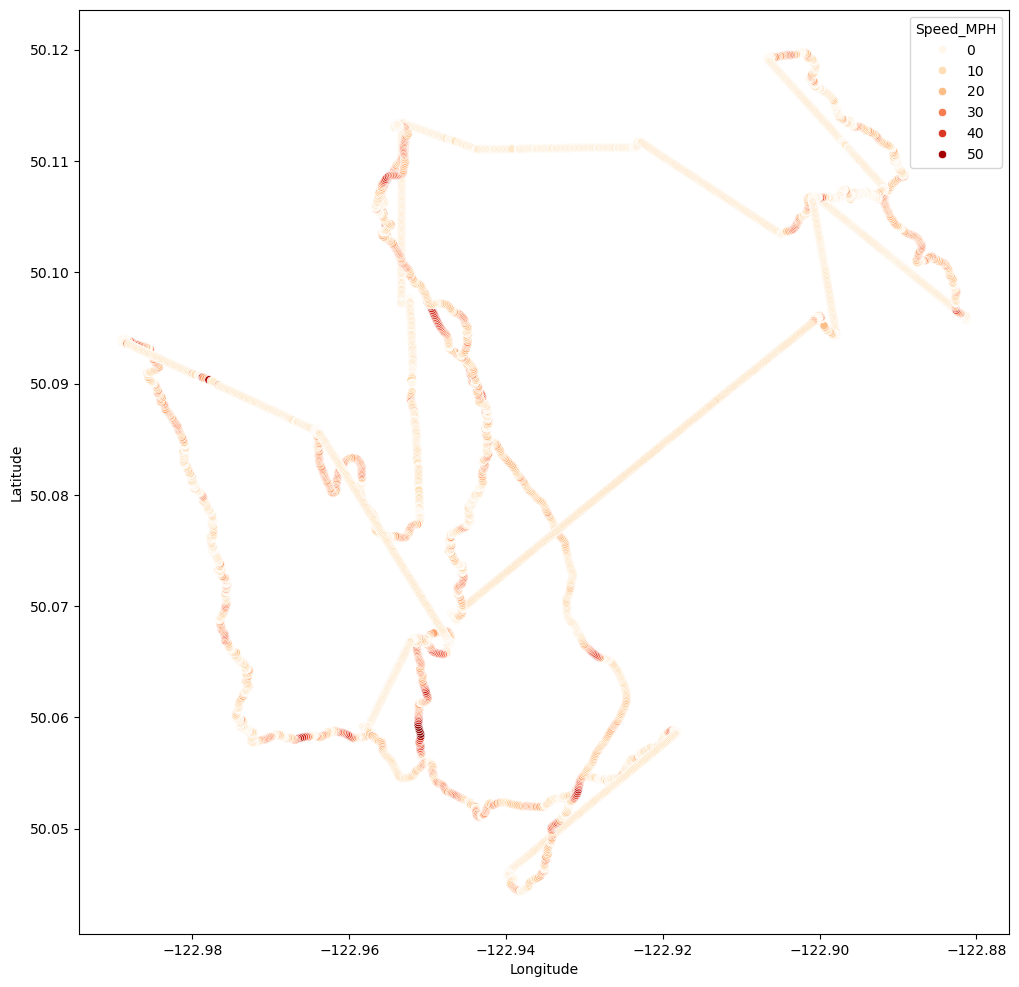

In [10]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=gpx_josh, x='Longitude', y='Latitude', hue='Speed_MPH', palette='OrRd')

<Axes: xlabel='Longitude', ylabel='Latitude'>

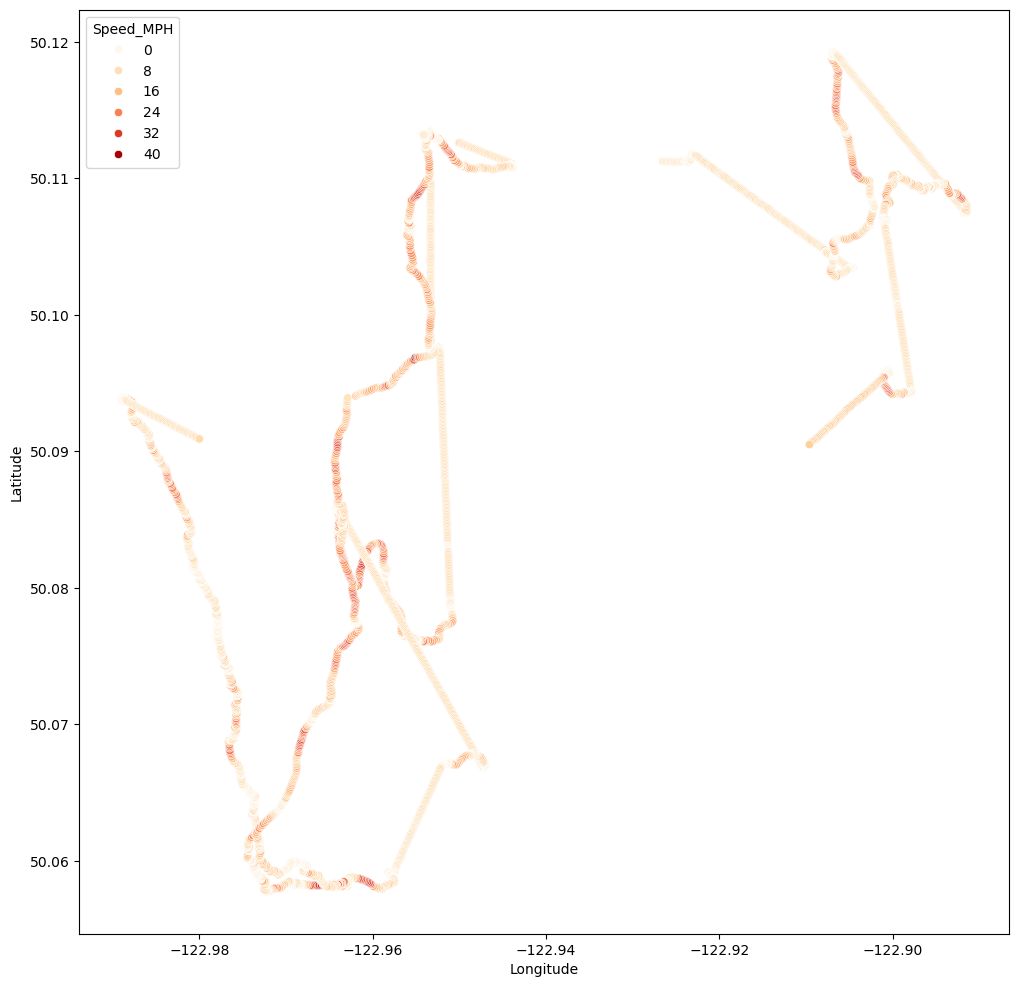

In [11]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=gpx_jon, x='Longitude', y='Latitude', hue='Speed_MPH', palette='OrRd')

In [12]:
run_info_josh = run_info_josh.merge(gpx_josh.groupby('Name').max('Speed')['Speed_MPH'], on='Name', how='left')
run_info_josh = run_info_josh.merge(gpx_josh.groupby('Name').mean('Speed')['Speed_MPH'], on = 'Name', how = 'left')

In [13]:
run_info_josh.rename(columns={
    'Speed_MPH_x':'Max_Speed_MPH',
    'Speed_MPH_y':'Mean_Speed_MPH'
}, inplace=True)

In [14]:
run_info_josh.sort_values(by='Max_Speed_MPH', ascending=False)

,Name,Longitude,Latitude,Elevation,Time,time_elapsed,end_time,Max_Speed_MPH,Mean_Speed_MPH
9,Run 5,-122.957416,50.059398,2178.784326,2024-03-07 12:22:53-08:00,0 days 00:15:21,2024-03-07 12:38:14-08:00,54.727813,18.404235
5,Run 3,-122.957573,50.059251,2183.242267,2024-03-07 10:47:20-08:00,0 days 01:17:11,2024-03-07 12:04:31-08:00,49.069620,13.076065
13,Run 7,-122.939676,50.046135,2037.706992,2024-03-07 01:11:21-08:00,0 days 01:02:29,2024-03-07 02:13:50-08:00,46.833660,18.999229
18,Run 9,-122.881405,50.096123,2131.747556,2024-03-07 02:50:29-08:00,0 days 00:26:47,2024-03-07 03:17:16-08:00,45.219718,15.463439
24,Run 12,-122.945875,50.069642,1828.492283,2024-03-07 04:07:20-08:00,NaT,NaT,41.751198,15.793647
20,Run 10,-122.891876,50.107393,1828.130413,2024-03-07 03:28:19-08:00,0 days 00:15:18,2024-03-07 03:43:37-08:00,37.961743,6.330923
7,Run 4,-122.947552,50.066370,1853.043952,2024-03-07 12:16:09-08:00,0 days 00:02:54,2024-03-07 12:19:03-08:00,37.342752,16.810175
16,Run 8,-122.904950,50.103412,1644.898104,2024-03-07 02:37:10-08:00,0 days 00:02:56,2024-03-07 02:40:06-08:00,32.572211,15.632160
1,Run 1,-122.951056,50.078425,1681.088996,2024-03-07 10:11:39-08:00,0 days 00:10:54,2024-03-07 10:22:33-08:00,32.508989,18.572846
11,Run 6,-122.957556,50.059226,2173.845804,2024-03-07 12:42:27-08:00,0 days 12:20:59,2024-03-07 01:03:26-08:00,32.164438,14.878007


In [15]:
run_info_jon = run_info_jon.merge(gpx_jon.groupby('Name').max('Speed')['Speed_MPH'], on='Name', how='left')
run_info_jon = run_info_jon.merge(gpx_jon.groupby('Name').mean('Speed')['Speed_MPH'], on = 'Name', how = 'left')

In [16]:
run_info_jon.rename(columns={
    'Speed_MPH_x':'Max_Speed_MPH',
    'Speed_MPH_y':'Mean_Speed_MPH'
}, inplace=True)

In [17]:
run_info_jon.sort_values(by='Max_Speed_MPH', ascending=False)

,Name,Longitude,Latitude,Elevation,Time,time_elapsed,end_time,Max_Speed_MPH,Mean_Speed_MPH
7,Run 4,-122.963043,50.058412,2059.593358,2024-03-07 12:31:14-08:00,0 days 01:45:49,2024-03-07 14:17:03-08:00,44.241515,14.486475
5,Run 3,-122.957425,50.059362,2170.953821,2024-03-07 10:47:12-08:00,0 days 01:04:53,2024-03-07 11:52:05-08:00,34.725175,9.818135
1,Run 1,-122.951039,50.079034,1678.810227,2024-03-07 10:10:30-08:00,0 days 00:12:03,2024-03-07 10:22:33-08:00,33.734539,16.474826
11,Run 6,-122.891418,50.107585,1818.899374,2024-03-07 14:52:06-08:00,0 days 00:15:36,2024-03-07 15:07:42-08:00,29.674726,10.788276
16,Run 8,-122.943917,50.110802,767.850232,2024-03-07 16:16:36-08:00,NaT,NaT,29.102227,13.538103
9,Run 5,-122.904938,50.103308,1634.285129,2024-03-07 14:26:33-08:00,0 days 00:16:58,2024-03-07 14:43:31-08:00,28.485402,13.217084
13,Run 7,-122.898443,50.094328,1906.705377,2024-03-07 15:14:32-08:00,0 days 00:06:36,2024-03-07 15:21:08-08:00,28.248055,14.298114
14,Lift 8 (Peak 2 Peak),-122.901114,50.095344,1872.916566,2024-03-07 15:21:08-08:00,0 days 00:50:42,2024-03-07 16:11:50-08:00,22.843893,12.878983
3,Run 2,-122.947079,50.067145,1844.829283,2024-03-07 10:36:26-08:00,0 days 00:06:09,2024-03-07 10:42:35-08:00,19.193002,10.257934
0,Lift 1,-122.953279,50.109679,746.486242,2024-03-07 09:52:55-08:00,0 days 00:17:35,2024-03-07 10:10:30-08:00,12.940435,8.473981
